In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [43]:
# Pretty print JSON for all launchpads
import json

Cityname = []    
Lat = []
Lng =[]
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_speed =[]
Country = []
Date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
record = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")
# Pretty print JSON for all launchpads
for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        Cityname.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Wind_speed.append(response["wind"]['speed'])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        time.sleep(1.01)
 
        print(f"Processing Record {record} | {city}")
        record = record + 1
    except: print(f"City {city} not found")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | east london
Processing Record 2 | gat
Processing Record 3 | cape town
Processing Record 4 | arraial do cabo
Processing Record 5 | bethel
Processing Record 6 | marzuq
Processing Record 7 | saint-philippe
Processing Record 8 | caldas da rainha
City vaitupu not found
Processing Record 9 | fairbanks
Processing Record 10 | tuktoyaktuk
Processing Record 11 | rikitea
Processing Record 12 | upernavik
Processing Record 13 | clyde river
Processing Record 14 | la ronge
Processing Record 15 | palmares
City mys shmidta not found
Processing Record 16 | longyearbyen
Processing Record 17 | raposa
Processing Record 18 | castro
Processing Record 19 | cherskiy
Processing Record 20 | vostok
City belushya guba not found
Processing Record 21 | sur
Processing Record 22 | puerto ayora
Processing Record 23 | kavieng
Processing Record 24 | tiksi
Processing Record 25 | arukutti
Processing Record 26 | albany
City taolanaro not found
Proc

Processing Record 229 | te anau
Processing Record 230 | isangel
Processing Record 231 | lorengau
Processing Record 232 | eyl
Processing Record 233 | pevek
Processing Record 234 | sao filipe
Processing Record 235 | cross lanes
City toliary not found
Processing Record 236 | truro
Processing Record 237 | machiques
Processing Record 238 | villarrica
Processing Record 239 | nelson bay
Processing Record 240 | grindavik
Processing Record 241 | tasiilaq
Processing Record 242 | mount isa
Processing Record 243 | kalmunai
Processing Record 244 | stromness
City jahrom not found
Processing Record 245 | kurilsk
Processing Record 246 | matagami
City dekoa not found
Processing Record 247 | avera
Processing Record 248 | rio gallegos
Processing Record 249 | los llanos de aridane
Processing Record 250 | asfi
Processing Record 251 | faya
Processing Record 252 | suluktu
City tubruq not found
Processing Record 253 | filingue
City palabuhanratu not found
Processing Record 254 | pandharpur
Processing Record 2

Processing Record 461 | sisophon
Processing Record 462 | dudinka
City utiroa not found
Processing Record 463 | solvychegodsk
Processing Record 464 | iquique
Processing Record 465 | leh
Processing Record 466 | tofte
Processing Record 467 | southampton
Processing Record 468 | greenfield
Processing Record 469 | kralendijk
Processing Record 470 | sitka
Processing Record 471 | novikovo
Processing Record 472 | lazaro cardenas
Processing Record 473 | palaikastron
Processing Record 474 | northam
Processing Record 475 | mersing
Processing Record 476 | gaoua
Processing Record 477 | ringsted
Processing Record 478 | ferzikovo
Processing Record 479 | mareeba
Processing Record 480 | banning
Processing Record 481 | imbituba
Processing Record 482 | taunggyi
Processing Record 483 | kenai
Processing Record 484 | maridi
Processing Record 485 | gladstone
Processing Record 486 | bollnas
Processing Record 487 | vila
Processing Record 488 | lufilufi
Processing Record 489 | belyy yar
Processing Record 490 | b

In [44]:


weathersummary = pd.DataFrame({
    "Cityname": Cityname, 
    "Cloudiness": Cloudiness,
    "Latitude": Lat,
    "Longitude": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Wind Speed": Wind_speed,
    "Country": Country,
    "Date": Date

})

In [48]:
weathersummary
weathersummary.to_csv(output_data_file)

In [49]:
weathersummary

,Cityname,Cloudiness,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Country,Date
0,East London,0,-33.02,27.91,48.20,70,8.05,ZA,1597374995
1,Kiryat Gat,0,31.61,34.76,75.99,42,3.44,IL,1597374996
2,Cape Town,20,-33.93,18.42,52.00,93,4.70,ZA,1597374901
3,Arraial do Cabo,0,-22.97,-42.03,71.96,84,26.69,BR,1597374702
4,Bethel,40,41.37,-73.41,72.00,94,1.81,US,1597374999
...,...,...,...,...,...,...,...,...,...
559,Gorontalo,26,0.54,123.06,88.90,47,7.18,ID,1597375820
560,Vaitape,9,-16.52,-151.75,79.27,81,17.16,PF,1597375821
561,Olinda,40,-8.01,-34.86,75.20,78,8.05,BR,1597375823
562,Assiut,0,27.18,31.18,78.80,50,9.17,EG,1597375824


In [51]:
weathersummary.loc[weathersummary["Humidity"] > 100]

,Cityname,Cloudiness,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Country,Date


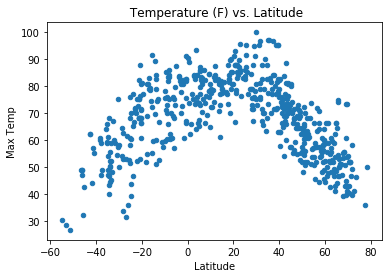

 The closer the a city is to the equator, which is 0, the warmer it is.


In [105]:
graph4 = weathersummary.plot(kind = "scatter", x = "Latitude", y = "Max Temp", title = " Temperature (F) vs. Latitude")
plt.show()
fig = graph4.get_figure()
fig.savefig("output_data/fig4.png")
print(f" The closer the a city is to the equator, which is 0, the warmer it is.")

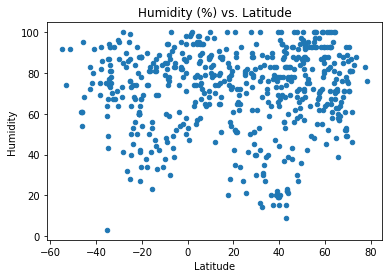

Humidity varies accross all latitudes


In [102]:
graph1 = weathersummary.plot(kind = "scatter", x = "Latitude", y = "Humidity", title = "Humidity (%) vs. Latitude")
plt.show()
fig = graph1.get_figure()
fig.savefig("output_data/fig1.png")
print(f"Humidity varies accross all latitudes")

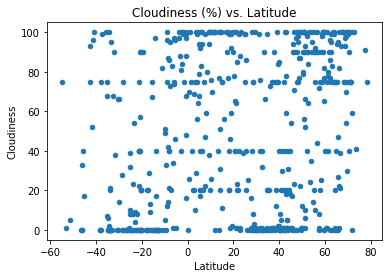

 There doesn't appear to be any correlation between latitude and cloudiness.


In [103]:
graph2 = weathersummary.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", title = "Cloudiness (%) vs. Latitude")
plt.show()
fig = graph2.get_figure()
fig.savefig("output_data/fig2.png")
print(f" There doesn't appear to be any correlation between latitude and cloudiness.")

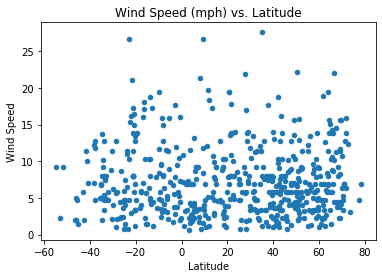

 There are a couple outliers but the highest concentration of windy cities are further away from the equator.


In [104]:
graph3 = weathersummary.plot(kind = "scatter", x = "Latitude", y = "Wind Speed", title = "Wind Speed (mph) vs. Latitude")
plt.show()
fig = graph3.get_figure()
fig.savefig("output_data/fig3.png")
print(f" There are a couple outliers but the highest concentration of windy cities are further away from the equator.")

In [71]:
#use loc to split dataframe into 2 parts, norhtern and southern hemisphere. Check where northern/southen guidelines, 
northerndf = weathersummary.loc[weathersummary["Latitude"] > 0]
southerndf = weathersummary.loc[weathersummary["Latitude"] < 0]      
southerndf

,Cityname,Cloudiness,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Country,Date
0,East London,0,-33.02,27.91,48.20,70,8.05,ZA,1597374995
2,Cape Town,20,-33.93,18.42,52.00,93,4.70,ZA,1597374901
3,Arraial do Cabo,0,-22.97,-42.03,71.96,84,26.69,BR,1597374702
6,Saint-Philippe,40,-21.36,55.77,68.00,60,8.05,RE,1597375002
10,Rikitea,4,-23.12,-134.97,70.23,67,10.36,PF,1597374922
...,...,...,...,...,...,...,...,...,...
550,Palmares do Sul,66,-30.26,-50.51,57.43,96,2.06,BR,1597375809
556,Xambioá,1,-6.41,-48.54,75.97,43,3.04,BR,1597375816
560,Vaitape,9,-16.52,-151.75,79.27,81,17.16,PF,1597375821
561,Olinda,40,-8.01,-34.86,75.20,78,8.05,BR,1597375823


In [86]:
#creating a function to create linear regression graphs.  northern and southern dataframes, title, x&y axis
#inside the function create a variable to store which data frame we are querying
def creategraph(df, xaxis, yaxis, title):
    
    from scipy.stats import linregress

    (slope, intercept, rvalue, pvalue, stderr) = linregress(
        df[xaxis], df[yaxis])
    regress_values = df[xaxis] * slope + intercept    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(df[xaxis],df[yaxis])
    plt.plot(df[xaxis],regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")

    plt.show()

The r-squared is: 0.5382459264932561


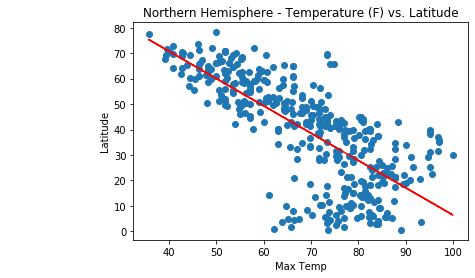

In [87]:
creategraph(df= northerndf, yaxis ="Latitude", xaxis = "Max Temp", title = "Northern Hemisphere - Temperature (F) vs. Latitude" )

The r-squared is: 0.4836424897444334


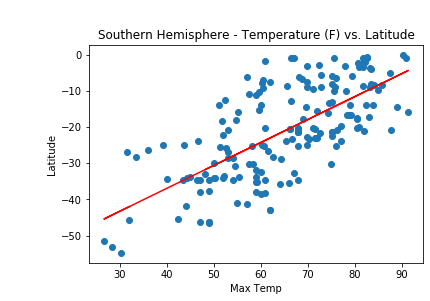

In [89]:
creategraph(df= southerndf, yaxis ="Latitude", xaxis = "Max Temp", title = "Southern Hemisphere - Temperature (F) vs. Latitude" )

## Observations
    Cities closer the equarter have warmer temperatures.

The r-squared is: 0.004722845201299954


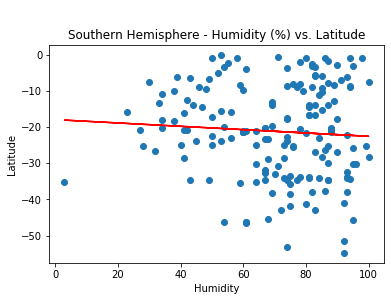

In [91]:
creategraph(df= southerndf, yaxis ="Latitude", xaxis = "Humidity", title = "Southern Hemisphere - Humidity (%) vs. Latitude" )

The r-squared is: 0.0001257928118757463


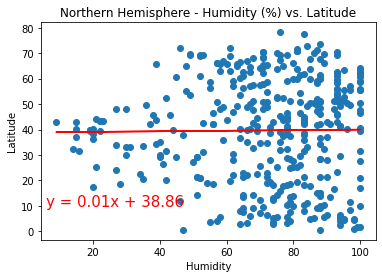

In [92]:
creategraph(df= northerndf, yaxis ="Latitude", xaxis = "Humidity", title = "Northern Hemisphere - Humidity (%) vs. Latitude" )

## observations
Humity appears to equally dispursed.  Latitude has no significant impact on humidity.

The r-squared is: 0.005413953270437754


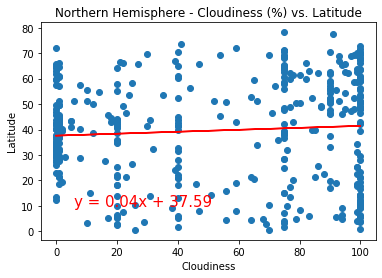

In [93]:
creategraph(df= northerndf, yaxis ="Latitude", xaxis = "Cloudiness", title = "Northern Hemisphere - Cloudiness (%) vs. Latitude" )

The r-squared is: 0.07494875887020029


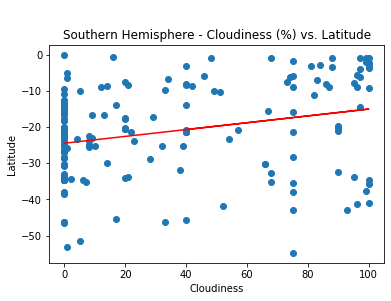

In [95]:
creategraph(df= southerndf, yaxis ="Latitude", xaxis = "Cloudiness", title = "Southern Hemisphere - Cloudiness (%) vs. Latitude" )

## observations
Since R-squared is not close to 1 there isn't strong enough data or a large enough sample size to draw 
any correlations between latitude and cloudiness for both northern and southern hemispheres. 

The r-squared is: 0.010296680629146078


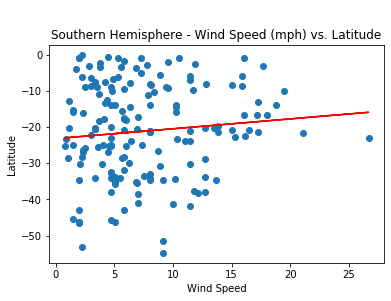

In [98]:
creategraph(df= southerndf, yaxis ="Latitude", xaxis = "Wind Speed", title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude" )

The r-squared is: 0.003343720409702017


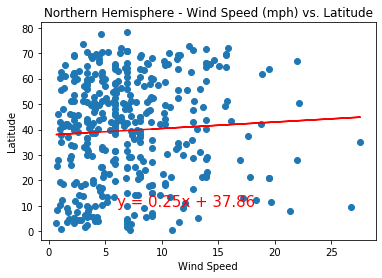

In [100]:
creategraph(df= northerndf, yaxis ="Latitude", xaxis = "Wind Speed", title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude" )

## Observation
The random cities collected rarely exceed wind speed over 25 mph.